In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from empirical_mdn import *
noise_std = 1
n  = 300 
p =500
y = np.random.uniform(-.5, 2.5, n )
y2 = np.random.uniform(-.5, 2.5, n )
X = y.reshape(-1, 1)  # Reshape y into a 2D array (n_samples, 1)
X = np.hstack((y.reshape(-1, 1), y2.reshape(-1, 1)))
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5 and  0.5 < y2[i] < 1.5 ) or (1.5 < y[i] < 2 and 0 < y2[i] < 0.5  ):
        xtrue[i] = np.random.normal(1, scale=0.5)
    else:
        xtrue[i] = np.random.normal(-1, scale=0.5)

obs_noise_std = np.random.uniform(0.5,  1.5, len(xtrue))  # Varying noise levels
# Generate x (noisy observations)


v = np.random.rand(p)
rank_1_matrix = np.outer(xtrue, v)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix,
               prior_L= "emdn",
               X_l= X,
               K=3)

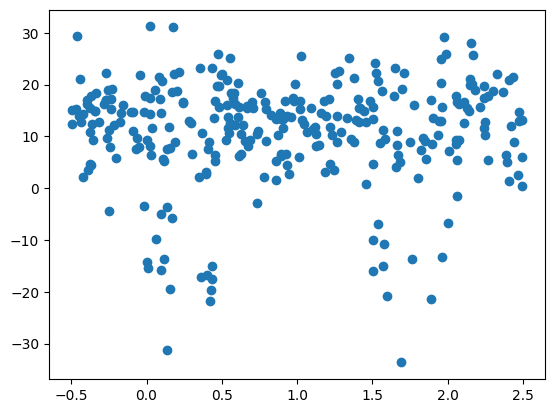

In [4]:
mycebmf.init_LF()
plt.scatter(y, mycebmf.L[:,0])

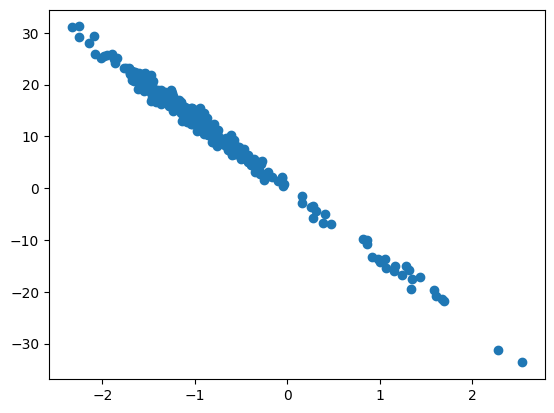

In [5]:
plt.scatter(xtrue, mycebmf.L[:,0])

In [6]:
mycebmfbasic= cEBMF(data= noisy_matrix )
mycebmfbasic.init_LF()

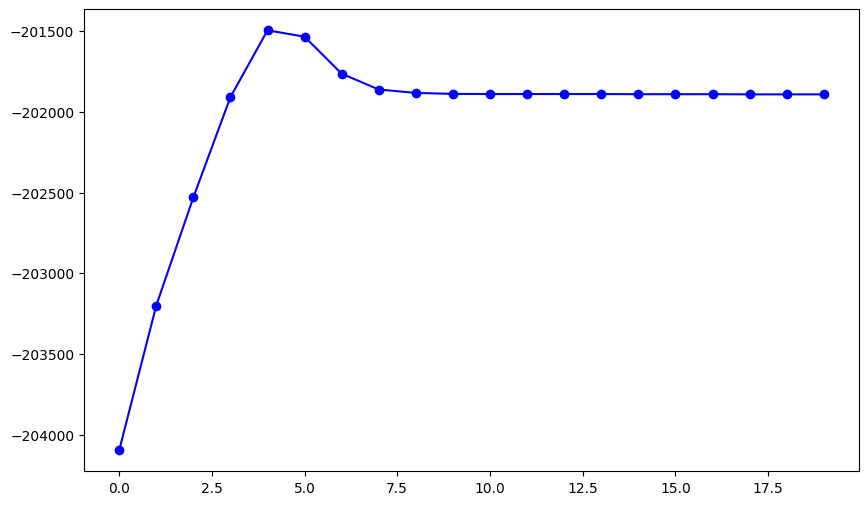

In [7]:
for i in range(20):
    mycebmfbasic.iter()
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmfbasic.obj)[1:], marker='o', linestyle='-', color='b')

In [8]:
mycebmf.L =  -mycebmfbasic.L
mycebmf.L2 = mycebmfbasic.L2
mycebmf.F  = mycebmfbasic.F
mycebmf.F2 = mycebmfbasic.F2
for i in range(20):
    mycebmf.iter()

Epoch 10/50, Loss: 1.1757
Epoch 20/50, Loss: 0.9465
Epoch 30/50, Loss: 0.7493
Epoch 40/50, Loss: 0.6844
Epoch 50/50, Loss: 0.6688
Epoch 10/50, Loss: 0.7991
Epoch 20/50, Loss: 0.4095
Epoch 30/50, Loss: -1.1314
Epoch 40/50, Loss: -0.2670
Epoch 50/50, Loss: -0.6936
Epoch 10/50, Loss: 0.8208
Epoch 20/50, Loss: 0.4791
Epoch 30/50, Loss: -1.1811
Epoch 40/50, Loss: -1.8208
Epoch 50/50, Loss: -1.7940
Epoch 10/50, Loss: 0.6508
Epoch 20/50, Loss: 0.6401
Epoch 30/50, Loss: 0.6305
Epoch 40/50, Loss: 0.6207
Epoch 50/50, Loss: 0.6098
Epoch 10/50, Loss: -1.3356
Epoch 20/50, Loss: -1.4454
Epoch 30/50, Loss: -1.4221
Epoch 40/50, Loss: -1.4510
Epoch 50/50, Loss: -1.4585
Epoch 10/50, Loss: -1.3206
Epoch 20/50, Loss: -1.4464
Epoch 30/50, Loss: -1.4528
Epoch 40/50, Loss: -1.4577
Epoch 50/50, Loss: -1.4609
Epoch 10/50, Loss: 0.6016
Epoch 20/50, Loss: 0.5825
Epoch 30/50, Loss: 0.5660
Epoch 40/50, Loss: 0.5487
Epoch 50/50, Loss: 0.5281
Epoch 10/50, Loss: -0.1385
Epoch 20/50, Loss: -0.1520
Epoch 30/50, Loss: -

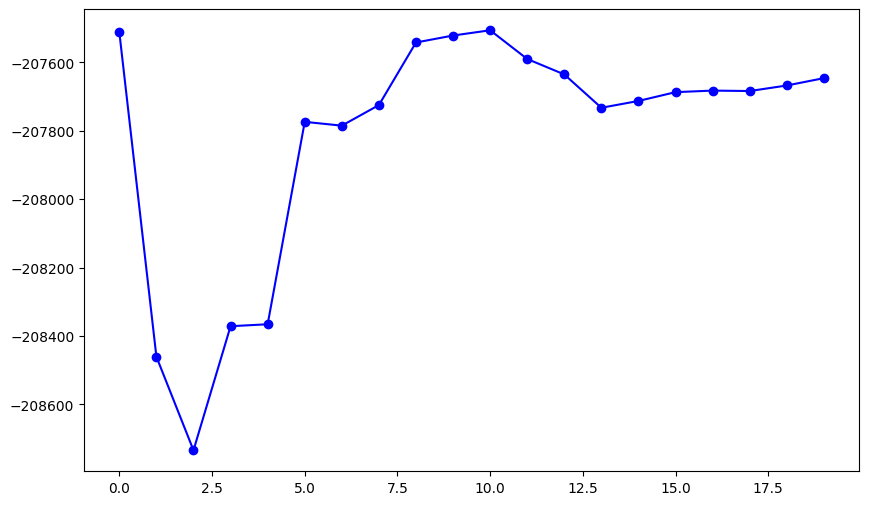

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

[[ 1.         -0.99477976]
 [-0.99477976  1.        ]]
[[ 1.         -0.99529936]
 [-0.99529936  1.        ]]
[[ 1.         -0.99528382]
 [-0.99528382  1.        ]]


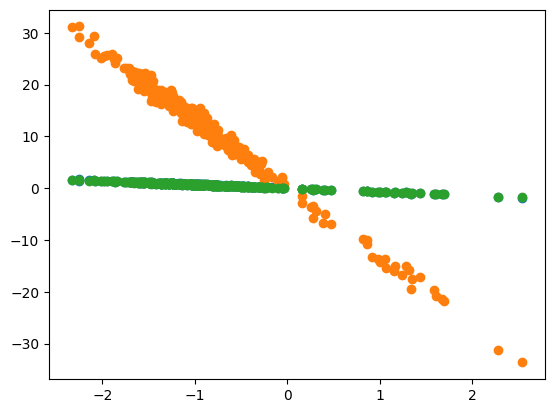

In [10]:

mf= cEBMF(data= noisy_matrix,
               prior_L= "emdn",
               X_l= X,
               K=3)
mf.init_LF()
plt.scatter(xtrue, mycebmf.L[:,0])
plt.scatter(xtrue, mf.L[:,0])
plt.scatter(xtrue, mycebmfbasic.L[:,0])


print( np.corrcoef(xtrue, mycebmf.L[:,0]))
print( np.corrcoef(xtrue, mf.L[:,0]))
print( np.corrcoef(xtrue, mycebmfbasic.L[:,0]))

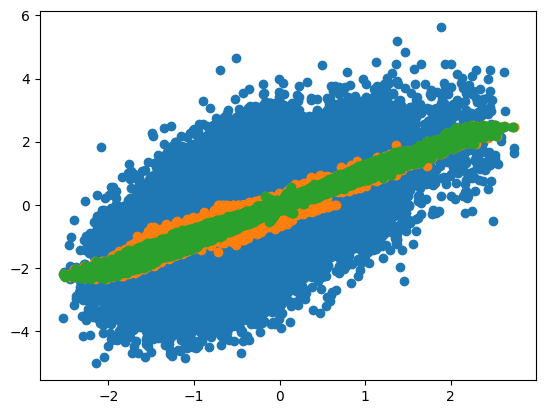

In [11]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(mycebmfbasic.Y_fit, rank_1_matrix)

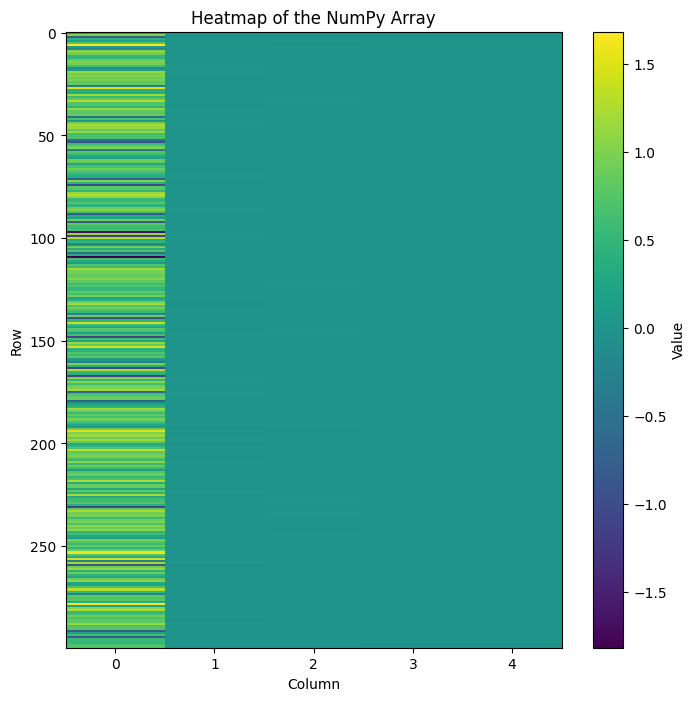

In [12]:
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


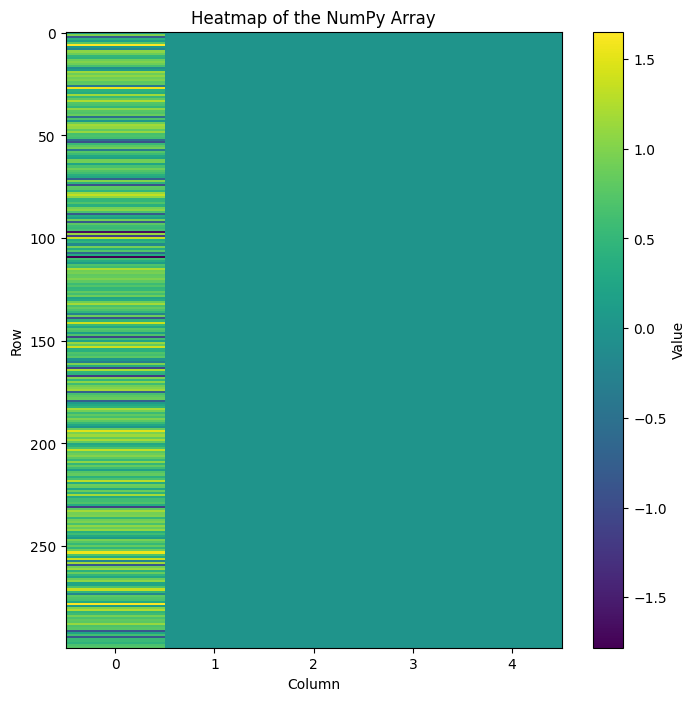

In [13]:
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmfbasic.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


In [14]:
np.sqrt(np.mean( (mycebmf.Y_fit -rank_1_matrix )**2))

np.float64(0.08492005474677884)

In [15]:
np.sqrt(np.mean( (mycebmfbasic.Y_fit -rank_1_matrix )**2))

np.float64(0.07368732863735503)

0.08492005474677884
0.07514330177874555
0.07368732863735503
0.07482087608592619


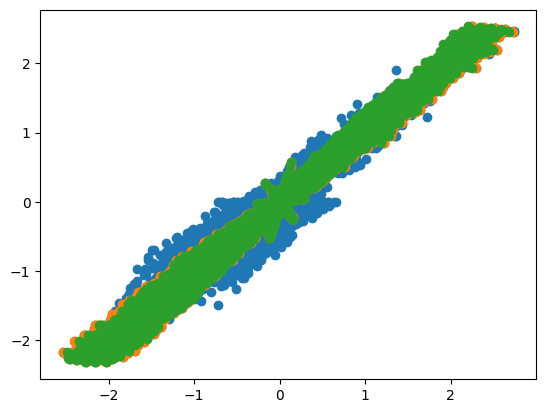

In [16]:
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)
plt.scatter(np.outer(mycebmfbasic.L[:,0],mycebmfbasic.F[:,0] ), rank_1_matrix)
print(np.sqrt(np.mean( (mycebmf.Y_fit -rank_1_matrix )**2)))
print(np.sqrt(np.mean( ( np.outer(mycebmf.L[:,0],mycebmf.F[:,0] )-rank_1_matrix )**2)))
print(np.sqrt(np.mean( (mycebmfbasic.Y_fit -rank_1_matrix )**2)))
print(np.sqrt(np.mean( (np.outer(mycebmfbasic.L[:,0],mycebmfbasic.F[:,0] )-rank_1_matrix )**2)))

In [17]:
tt=  mycebmf.Y_fit= np.sum( [np.outer(   mycebmf.L[:, k]  ,  mycebmf.F[:, k]    ) for k in range( mycebmf.K)], axis=0)

print(np.sqrt(np.mean( ( tt-rank_1_matrix )**2)))

0.08492005474677884


In [18]:
mycebmf.L

array([[ 0.14323743, -0.00329764, -0.00221982, -0.        , -0.        ],
       [ 1.0356482 ,  0.00593488, -0.00359693, -0.        , -0.        ],
       [-0.76669806, -0.0110156 , -0.0019052 , -0.        , -0.        ],
       ...,
       [ 0.49737087,  0.0043965 ,  0.0060925 , -0.        , -0.        ],
       [ 0.69069743, -0.00682607, -0.00585554, -0.        , -0.        ],
       [ 0.7687723 ,  0.00270834, -0.00440266, -0.        , -0.        ]],
      shape=(300, 5), dtype=float32)